In [2]:
!pip install matplotlib
!pip install pandas
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
# Load your dataset
file_path = '/Users/joseph/Downloads/Kings Attendance DS Club/Kings_Attendance_Post_Covid.csv'
df = pd.read_csv(file_path)

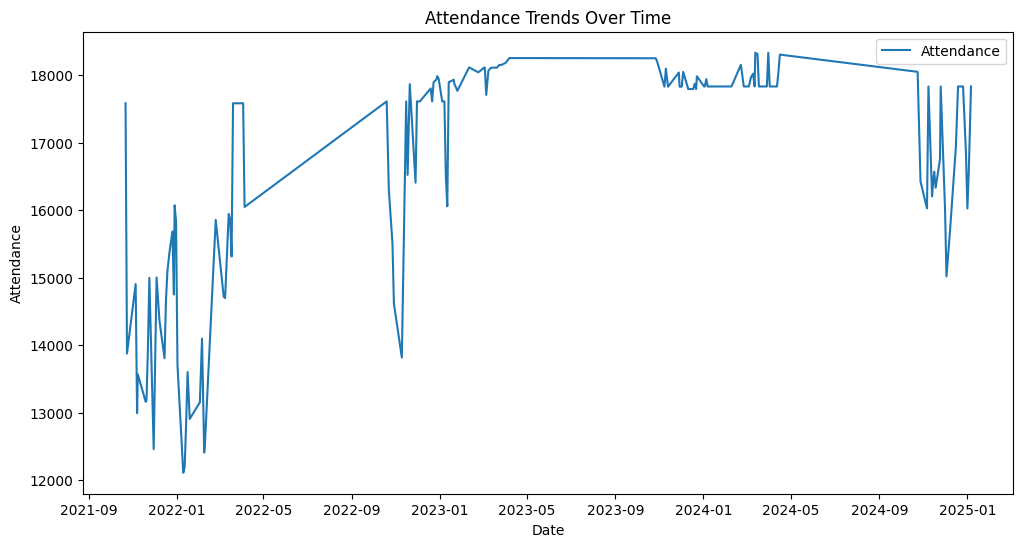

In [6]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot attendance over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Attend.'], label='Attendance')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.title('Attendance Trends Over Time')
plt.legend()
plt.show()

/var/folders/fk/22_b41r16kd77_k6t241p88w0000gn/T/ipykernel_36503/2502960574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attendance_by_day.index, y=attendance_by_day.values, palette='viridis')


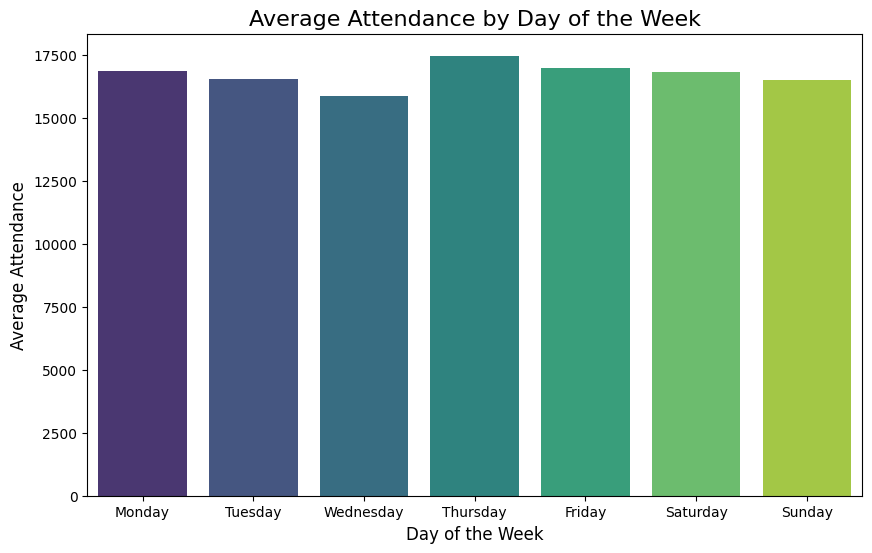

In [7]:
# Group the data by 'Day' and calculate the mean attendance
attendance_by_day = df.groupby('Day')['Attend.'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=attendance_by_day.index, y=attendance_by_day.values, palette='viridis')
plt.title('Average Attendance by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

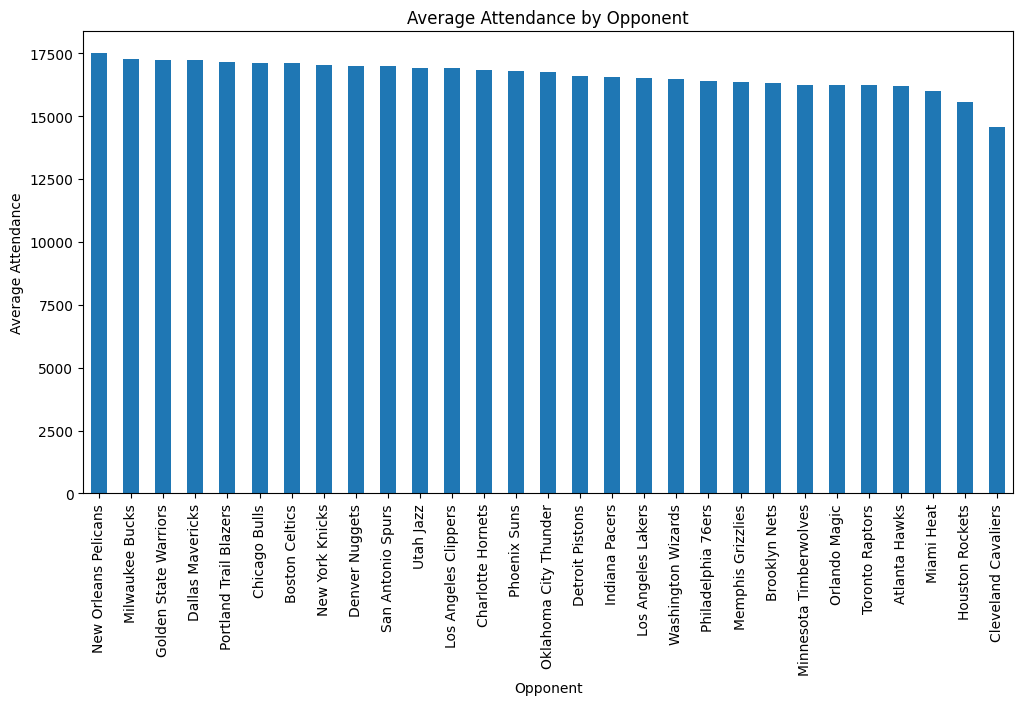

In [8]:
avg_attendance_by_opponent = df.groupby('Opponent')['Attend.'].mean().sort_values(ascending=False)
avg_attendance_by_opponent.plot(kind='bar', figsize=(12, 6), title='Average Attendance by Opponent')
plt.ylabel('Average Attendance')
plt.show()

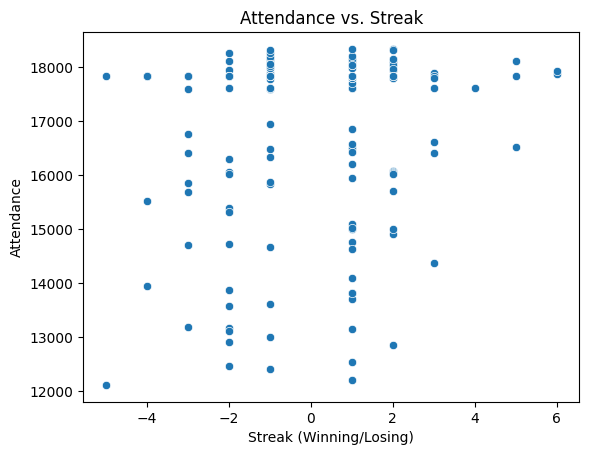

In [9]:
df['StreakValue'] = df['Streak'].apply(lambda x: int(x[1:]) if x.startswith('W') else -int(x[1:]))
sns.scatterplot(x='StreakValue', y='Attend.', data=df)
plt.title('Attendance vs. Streak')
plt.xlabel('Streak (Winning/Losing)')
plt.ylabel('Attendance')
plt.show()

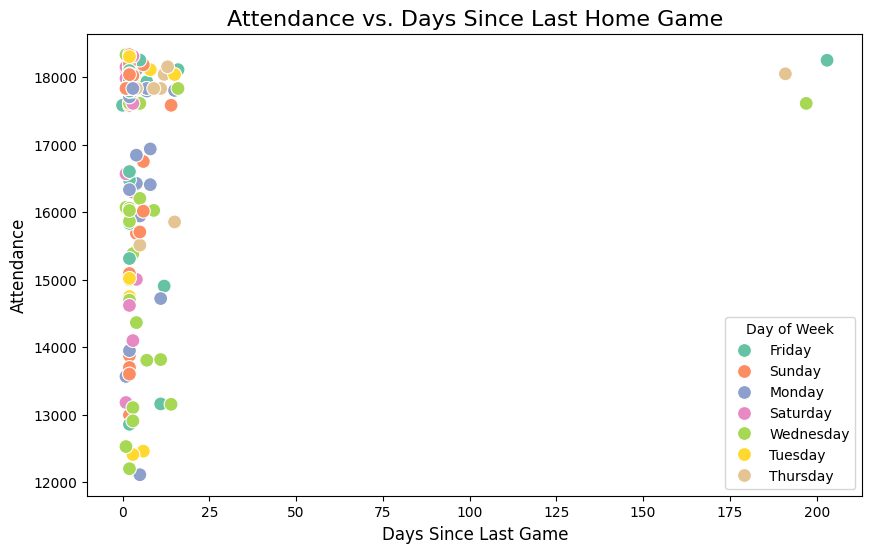

In [11]:
# Scatterplot: Days since last game vs. Attendance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DaysSinceLastGame', y='Attend.', data=df, hue='Day', palette='Set2', s=100)
plt.title('Attendance vs. Days Since Last Home Game', fontsize=16)
plt.xlabel('Days Since Last Game', fontsize=12)
plt.ylabel('Attendance', fontsize=12)
plt.legend(title='Day of Week')
plt.show()

Rows with invalid 'Start (ET)' times:
     Start (ET)  StartHour
0    10:00pmmmm        NaN
1     9:00pmmmm        NaN
2    10:00pmmmm        NaN
3     6:00pmmmm        NaN
4    10:00pmmmm        NaN
..          ...        ...
140  10:00pmmmm        NaN
141  10:00pmmmm        NaN
142  10:00pmmmm        NaN
143  10:00pmmmm        NaN
144  10:00pmmmm        NaN

[145 rows x 2 columns]


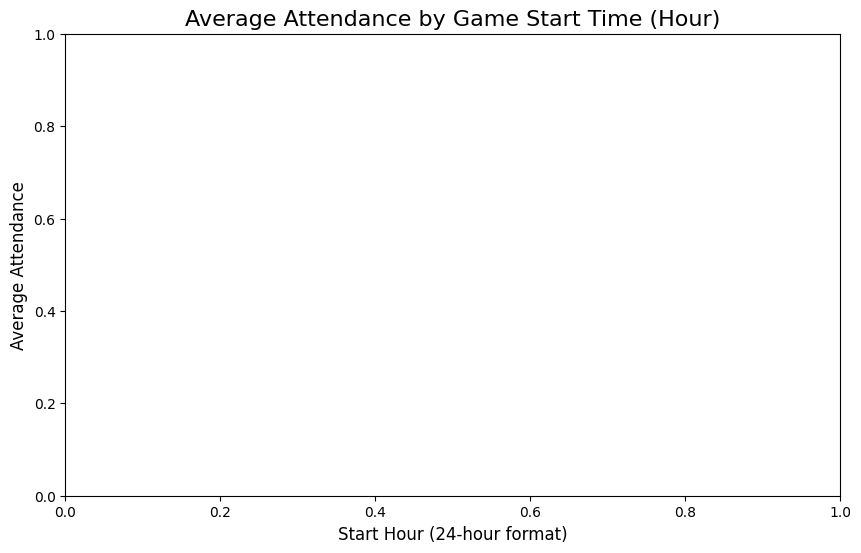

In [16]:
# Ensure the 'Start (ET)' column contains consistent time formats
df['Start (ET)'] = df['Start (ET)'].str.replace(r'(\d{1,2}:\d{2})([ap])', r'\1\2m', regex=True)

# Convert the 'Start (ET)' column to datetime format, ensuring we capture the correct time
df['StartHour'] = pd.to_datetime(df['Start (ET)'], format='%I:%M%p', errors='coerce').dt.hour

# Check for rows where 'StartHour' conversion failed
invalid_rows = df[df['StartHour'].isna()]

# Output the invalid rows for debugging
if not invalid_rows.empty:
    print("Rows with invalid 'Start (ET)' times:")
    print(invalid_rows[['Start (ET)', 'StartHour']])

# Optionally, drop rows where 'StartHour' is NaN (or fill with a default value)
df = df.dropna(subset=['StartHour'])

# Calculate average attendance for each start hour
attendance_by_start_hour = df.groupby('StartHour')['Attend.'].mean()

# Plot as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=attendance_by_start_hour.index, y=attendance_by_start_hour.values, palette='viridis')
plt.title('Average Attendance by Game Start Time (Hour)', fontsize=16)
plt.xlabel('Start Hour (24-hour format)', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()